In [26]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [34]:
#define state 
class BMI_State(TypedDict):
    weight_kg : float
    height_m : float 
    bmi : float
    category : str


In [35]:
def calcualte_bmi(state:BMI_State)->BMI_State:
    weight = state['weight_kg']
    height = state['height_m']
    
    bmi = weight/(height**2)

    state['bmi'] = round(bmi,2)
    return state

def label_bmi(state:BMI_State)->BMI_State:
    bmi = state['bmi']

    if bmi < 18.5 :
        state['category'] = 'underweight'
    elif 18.5 <= bmi < 25 :
        state['category'] = 'normal'
    elif 25 <= bmi < 30 :
        state['category'] = 'overweight'
    else:
        state['category'] = 'obease'
    return state


In [36]:
# define graph 
graph = StateGraph(BMI_State)

# create a node 
graph.add_node('calcualte_bmi',calcualte_bmi)
graph.add_node('label_bmi',label_bmi)


# create edges 

graph.add_edge(START,'calcualte_bmi')
graph.add_edge('calcualte_bmi','label_bmi')
graph.add_edge('label_bmi',END)

# complile the graph 
workflow = graph.compile()

In [37]:
# execute the graph
intial_state = {'weight_kg':80 , 'height_m':1.75}
final_state = workflow.invoke(intial_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.75, 'bmi': 26.12, 'category': 'overweight'}


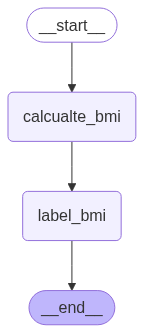

In [31]:
from IPython.display import Image, display

Image((workflow.get_graph().draw_mermaid_png()))
